[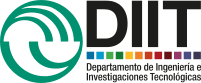](https://ingenieria.unlam.edu.ar/)   
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES)
2025
[Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)   

---


# Enunciado

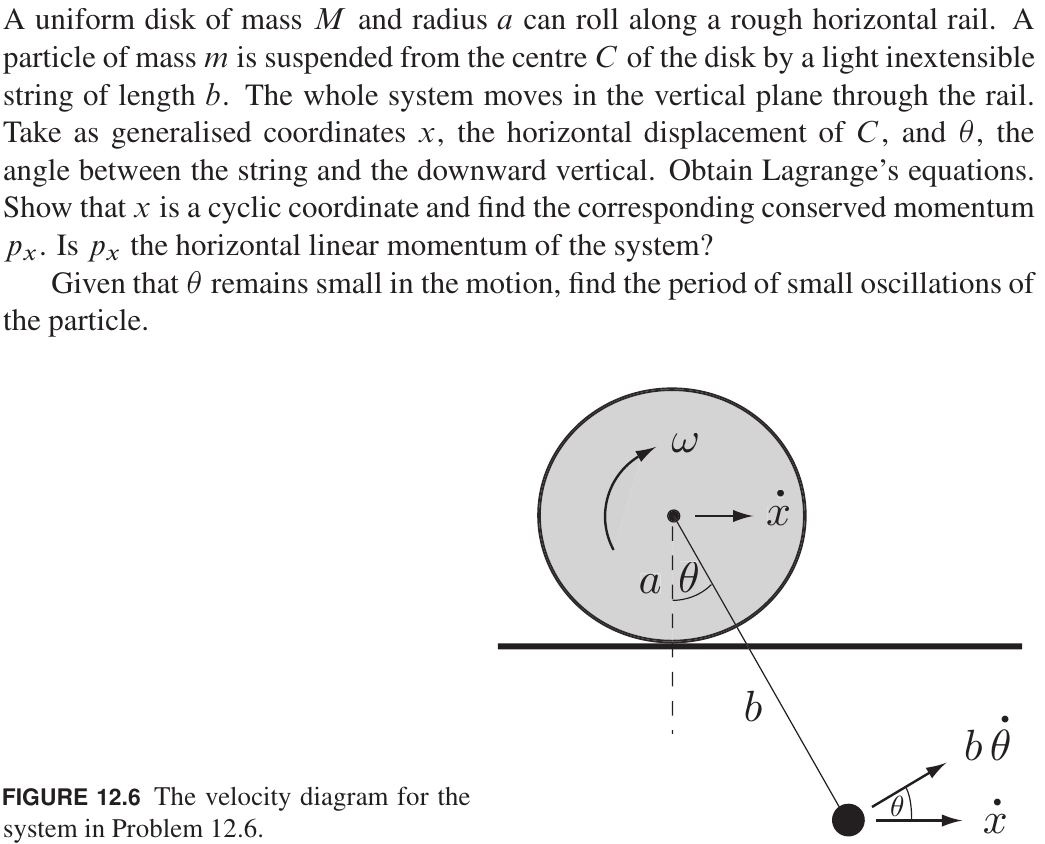

In [1]:
# módulo de cálculo simbólico
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
# Defino los parámetros físicos del sistema
M, a, b, m, g = sm.symbols('M, a, b, m, g', positive=True)

# Defino coordenadas generalizadas
x, theta = me.dynamicsymbols('x, theta')

In [3]:
# Posiciones

# Marco de referencia inercial
N = me.ReferenceFrame('N') 
disco_r = x * N.x
péndulo_r = disco_r + b *( sm.sin(theta) * N.x + sm.cos(theta) * (-N.y))

## Energía

In [4]:
def energíaCinéticaTraslación(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    T_traslación = sm.Eq(
        sm.Symbol('T_{traslación}'),
        unMedio* masa* velocidad.dot(velocidad)
        ).simplify()
    return T_traslación

In [5]:
disco_T = energíaCinéticaTraslación(M, disco_r, N)
disco_T

In [6]:
péndulo_T = energíaCinéticaTraslación(m, péndulo_r, N)
péndulo_T

In [7]:
def energíaCinéticaRotación(momentoDeInercia, velocidadAngular):
    """
    Calcula la energía cinética de un cuerpo extenso (no puntual) que rota en torno a un eje.

    Parámetros
    ----------
    momentoDeInercia : Multiplicación Sympy (sympy.core.mul.Mul)
        Expresada en referencia al eje de rotación para la velocidadAngular.
    velocidadAngular : Multiplicación Sympy (sympy.core.mul.Mul)
        Velocidad de rotación en torno a un eje.

    Retorna
    -------
    Igualdad Sympy (sympy.Equality)
        Energía cinética de rotación (I/2)* omega**2
    """
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5
    T_rotación = sm.Eq(
        sm.Symbol('T_{rotación}'),
        unMedio* momentoDeInercia* velocidadAngular**2
     ).simplify()
    return T_rotación

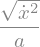

In [8]:
disco_r.dt(N).magnitude()/a

In [9]:
disco_momentoDeInercia = (M/2) * a**2
disco_omega = disco_r.dt(N).magnitude()/a
disco_T_rotación = energíaCinéticaRotación(disco_momentoDeInercia, disco_omega)
disco_T_rotación

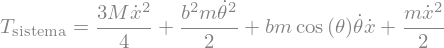

In [10]:
# Energía cinética total
sistema_T = sm.Eq(
    sm.Symbol('T_\mathrm{sistema}'),
    (disco_T.rhs + péndulo_T.rhs + disco_T_rotación.rhs).expand()
    ).simplify()
sistema_T

In [11]:
def energíaPotencialGravitatoria(masa, posición, aceleracionGravitatoria):
    """
    Retorna la energía potencial gravitatoria de una partícula de masa m cuya posición r está dada en un sistema de referencia en el cual g es la aceleración gravitatoria terrestre.
    
    Parámetros
    ----------
    aceleracionGravitatoria: (sympy.physics.vector.vector.Vector)
        vector orientado según el sistema de referencia
    masa: (sympy.core.symbol.Symbol
        del cuerpo en cuestión
    posición: (sympy.core.symbol.Symbol)
        del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        V = - (m \vec{aceleracionGravitatoria}) \cdot{posición}
    """
    V_gravitatoria = sm.Eq(
        sm.Symbol('V_{gravitatoria}'),
        - (masa* aceleracionGravitatoria).dot(posición)
        ).simplify()
    return V_gravitatoria

In [12]:
péndulo_V = energíaPotencialGravitatoria(m, péndulo_r, -g * N.y)
péndulo_V

## Ecuaciones de Euler-Lagrange

In [13]:
def eulerLagrange(T, V, coordenadaGeneralizada):
    '''    
    Esta función devuelve la ecuación de Euler-Lagrange para una coordenada generalizada a partir de las energías del sistema.
    
    Parámetros
    ----------
    T : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        Para la que quiere obtenerse la ecuación de Euler-Lagrange
        
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        Ecuación de Euler-Lagrange homogénea para la coordenadaGeneralizada
    '''
    lagrangiano = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # como se deriva respecto al tiempo con la función diff se declara t como símbolo 
    return sm.Eq(
        lagrangiano.diff(coordenadaGeneralizada.diff(t)).diff(t)
        - lagrangiano.diff(coordenadaGeneralizada) 
        , 0
    ).simplify()

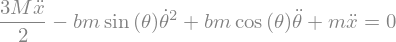

In [14]:
x_EL = eulerLagrange(sistema_T, péndulo_V, x)
x_EL

Para un lagrangiano típico de la forma:
$$
\mathcal{L} = T - V = \frac{1}{2}m\dot{q}^2 - V(q)
$$
donde $T$ es la energía cinética y $V$ es la energía potencial.

Calculando la derivada con respecto a $\dot{q}$:
$$
\frac{\partial \mathcal{L}}{\partial \dot{q}} = \frac{\partial}{\partial \dot{q}} \left( \frac{1}{2}m\dot{q}^2 \right) = m\dot{q}
$$
que es precisamente el momento (generalizado), $p_q$.

Puede verse que $x$ no aparece en la ecuación de Euler-Lagrange para $x$. 
Lo que le confiere la cualidad de ser coordenada cíclica.

$$
\begin{aligned}
\frac{\partial \mathcal{L} }{\partial x} &- \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x} }=0 \\
& - \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x} }=0 \\
\end{aligned}.
$$
Siendo la cantidad conservada $p_x = \frac{\partial \mathcal{L}}{\partial \dot{x}}$.


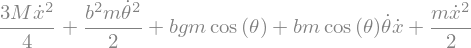

In [15]:
lagrangiano = (sistema_T.rhs - péndulo_V.rhs).expand()
lagrangiano

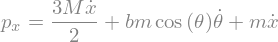

In [16]:
t = sm.Symbol('t')
x_p = sm.Eq(
    sm.Symbol('p_x'),
    lagrangiano.diff(x.diff(t)).simplify()
)
x_p


Euler-Lagrange para la coordenada generalizada $\theta$.

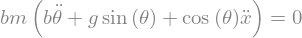

In [17]:
theta_EL = eulerLagrange(sistema_T, péndulo_V, theta)
theta_EL

## Pequeñas oscilaciones

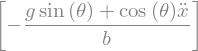

In [18]:
theta_sol = sm.solve(theta_EL, theta.diff(t, t))
theta_sol

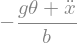

In [19]:
theta_sol[0].subs([(sm.sin(theta), theta), (sm.cos(theta), 1)]) 

## Resolución del sistema de aceleraciones

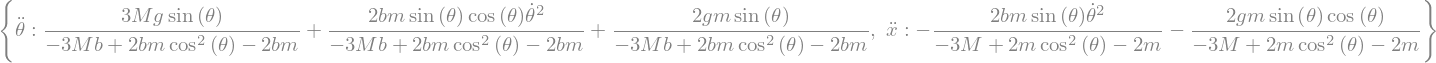

In [20]:
aceleraciones = sm.solve([x_EL, theta_EL], [x.diff(t, t), theta.diff(t, t)])
aceleraciones

## Integración numérica

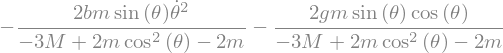

In [21]:
aceleraciones[x.diff(t,t)]

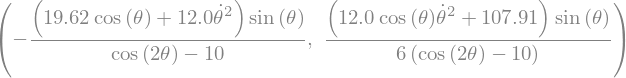

In [22]:
# parámetros_físicos
g_magnitud = 9.81 # [m s-2]
m_magnitud = 1 # [kg]
M_magnitud = 3 # [kg]
a_magnitud = 2 # [m]
b_magnitud = 6 # [m]
magnitudes = {
    g : g_magnitud,
    m : m_magnitud,
    M : M_magnitud,
    a : a_magnitud,
    b : b_magnitud,
}
x_pp_magnitudes = aceleraciones[x.diff(t,t)].subs(magnitudes).simplify() # [m s-2]
theta_pp_magnitudes = aceleraciones[theta.diff(t,t)].subs(magnitudes).simplify() # [m s-2]
x_pp_magnitudes, theta_pp_magnitudes

Declaración del vector de estado.

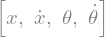

In [23]:
y = [x, x.diff(t), theta, theta.diff(t)]
y

Condiciones iniciales.

In [24]:
# biblioteca de cálculo numérico general
import numpy as np

In [117]:
# si se necesita un número como Pi, ahora este debe ser de numpy
y_inicial = [
    1, 0.5, np.pi/8, 0
    ] # [unidades SI] en el orden del vector de estado
t_rango = np.linspace(0, 30, 1000) # tiempos inicial,final y cuantos tiempos intermedios equiespaciados

Corrida de integración.

In [118]:
x_pp_lambda = sm.lambdify(y, x_pp_magnitudes) # [m s-2], y es el vector de estado
theta_pp_lambda = sm.lambdify(y, theta_pp_magnitudes) # [m s-2]

In [119]:
# defino una función con el sistema de derivadas
# t : no se usa en este sistema pero lo dejamos para uso posterior
# y : lista de estado con [y[0], y[1], y[2], y[3]]
# y[0]: x
# y[1]: x punto
# y[2]: theta
# y[3]: theta punto
# dydt : lista de derivadas
def y_punto(t, y):
    dydt = [y[1],
            x_pp_lambda(y[0], y[1], y[2], y[3]),
            y[3],
            theta_pp_lambda(y[0], y[1], y[2], y[3]),
           ]
    return dydt

In [120]:
# biblioteca de cálculo científico: eficientes herramientas de cálculo numérico
# Importo la función solve_ivp: resolver un sistema de ODEs con condiciones iniciales
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
from scipy.integrate import solve_ivp

In [121]:
# Integración de a pasos en el tiempo
y_ode2 = solve_ivp(y_punto, (t_rango[0], t_rango[-1] ), y_inicial, t_eval = t_rango)

In [122]:
y_ode2.y[2]

array([ 3.92699082e-01,  3.92365173e-01,  3.91363961e-01,  3.89696830e-01,
        3.87366088e-01,  3.84375019e-01,  3.80727881e-01,  3.76429909e-01,
        3.71487313e-01,  3.65907522e-01,  3.59700916e-01,  3.52876346e-01,
        3.45443005e-01,  3.37411194e-01,  3.28792326e-01,  3.19598925e-01,
        3.09844622e-01,  2.99544163e-01,  2.88713399e-01,  2.77369295e-01,
        2.65529925e-01,  2.53214474e-01,  2.40443235e-01,  2.27237615e-01,
        2.13620127e-01,  1.99614397e-01,  1.85245161e-01,  1.70538264e-01,
        1.55520663e-01,  1.40220423e-01,  1.24666722e-01,  1.08886128e-01,
        9.29005265e-02,  7.67412395e-02,  6.04398328e-02,  4.40276194e-02,
        2.75356592e-02,  1.09947589e-02, -5.56452777e-03, -2.21119003e-02,
       -3.86173111e-02, -5.50509659e-02, -7.13833232e-02, -8.75850947e-02,
       -1.03627245e-01, -1.19480993e-01, -1.35117809e-01, -1.50509417e-01,
       -1.65627794e-01, -1.80445170e-01, -1.94934029e-01, -2.09067108e-01,
       -2.22817395e-01, -

### Graficación

In [123]:
# biblioteca de graficación
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[Text(0.5, 0, 't [s]'),
 Text(0, 0.5, '$\\dot{x}$ [m/s]'),
 Text(0.5, 1.0, 'Velocidad')]

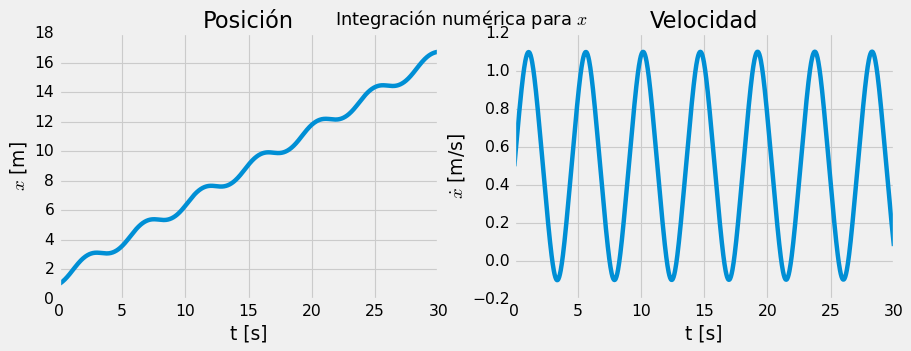

In [124]:
solucion = y_ode2
nombreCoordenada = 'x'

fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
fig.suptitle('Integración numérica para $'+ nombreCoordenada + '$', fontsize=16)
ax[0,0].plot(solucion.t, solucion.y[0]) # posición x
ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [m]', title='Posición')
ax[0,1].plot(solucion.t, solucion.y[1]) # velocidad x
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nombreCoordenada+ '}$ [m/s]', title='Velocidad')

## Animación

In [87]:
import matplotlib.animation as animation
from matplotlib.patches import Circle
from IPython.display import HTML

In [125]:
L = b_magnitud
R = a_magnitud
dt = y_ode2.t[1]
interval = dt*1000  # Delay between frames in ms.

x1 = y_ode2.y[0]
y1 = x1 * 0

x2 = L*np.sin(y_ode2.y[2]) + x1
y2 = -L*np.cos(y_ode2.y[2]) + y1


In [128]:
# plt.style.use('dark_background')
# plt.style.use('Solarize_Light2')  # ¿porqué no anda?
plt.style.use('classic')

xin = -L
xout = 4*L

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(frameon=False, xlim=(xin, xout), ylim=(-1.5*L, 2.5))
ax.set_aspect('equal')
ax.grid()
# No ticks
ax.set_xticks([])
ax.set_yticks([])

ax.plot([xin, xout], [-R, -R], '-', lw=0.75, color='black')


line, = ax.plot([], 'o-', lw=2, color='black')

circ = Circle((1.0, 0.0), R)
ax.add_artist(circ)
# trace, = ax.plot([], [], '.-', lw=1, ms=2)
# time_template = 'time = %.1fs'
# time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# 2 part titles to get different font weights
ax.text(0.5, 1.5, "DISCO / ", transform=ax.transAxes,
        ha="right", va="bottom", color="b",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.5, "PENDULO", transform=ax.transAxes,
        ha="left", va="bottom", color="b",
        family="sans-serif", fontweight="bold", fontsize=16)

def animate(i):
    thisx = [x1[i], x2[i]]
    thisy = [y1[i], y2[i]]

    # history_x = x2[:i]
    # history_y = y2[:i]

    line.set_data(thisx, thisy)
    circ.center = x1[i], y1[i]
    # trace.set_data(history_x, history_y)
    # time_text.set_text(time_template % (i*dt))
    return line, circ


ani = animation.FuncAnimation(
    fig, animate, len(y_ode2.t), interval=interval, blit=False)
# plt.show()

plt.close()

# HTML(ani.to_jshtml())
HTML(ani.to_html5_video())


In [34]:
# Saving to video file

# f = r"animation.mp4" 
# writervideo = animation.FFMpegWriter(fps=60) 
# ani.save(f, writer=writervideo)